# Cellular Automata

This notebook presents solutions to the exercises in <a href="http://www.greenteapress.com/compmod/html/thinkcomplexity007.html" target="_blank">Chapter 6</a> of Allen B. Downey's <a href="http://www.greenteapress.com/compmod/" target="_blank">Think Complexity</a>

 * [Exercise 1](#Exercise-1) : Circular Cellular Automata
 * [Exercise 2](#Exercise-2) : Randomness
 * [Exercise 3](#Exercise-3) : Structures
 * [Exercise 4](#Exercise-4) : Universality
 
"A cellular automaton is a model of a world with very simple physics. “Cellular” means that the space is divided into discrete chunks, called cells. An “automaton” is a machine that performs computations—it could be a real machine, but more often the “machine” is a mathematical abstraction or a computer simulation.

Automata are governed by rules that determine how the system evolves in time. Time is divided into discrete steps, and the rules specify how to compute the state of the world during the next time step based on the current state." [text](http://www.greenteapress.com/compmod/html/thinkcomplexity007.html#automata)


For 1-dimensional CAs, "there are three natural configurations:

 * **Finite sequence:** A finite number of cells arranged in a row. All cells except the first and last have two neighbors.
 * **Ring:** A finite number of cells arranged in a ring. All cells have two neighbors.
 * **Infinite sequence:** An infinite number of cells arranged in a row." [text](http://www.greenteapress.com/compmod/html/thinkcomplexity007.html#@default421)
 
 
"Wolfram proposes that the behavior of CAs can be grouped into four classes. 

 * **Class 1** contains the simplest (and least interesting) CAs, the ones that evolve from almost any starting condition to the same uniform pattern. 
 * **Class 2** CAs generate a simple pattern with nested structure; that is, the pattern contains many smaller versions of itself." [text](http://www.greenteapress.com/compmod/html/thinkcomplexity007.html#htoc48)
 * **Class 3** CAs that generate randomness (e.g. pseudo-random number generators) [text](http://www.greenteapress.com/compmod/html/thinkcomplexity007.html#htoc49)
 * **Class 4** CAs that are Turing complete. "There are some regular patterns but also some features that are hard to characterize." [text](http://www.greenteapress.com/compmod/html/thinkcomplexity007.html#htoc51)
 

**Exercise 1:** Download [thinkcomplex.com/CA.py](http://www.thinkcomplex.com/CA.py) and [thinkcomplex.com/CADrawer.py](http://www.thinkcomplex.com/CADrawer.py) and confirm that they run on your system; you might have to install additional Python packages.
Create a new class called CircularCA that extends CA so that the cells are arranged in a ring. Hint: you might find it useful to add a column of “ghost cells” to the array.

You can download my solution from [thinkcomplex.com/CircularCA.py](http://www.thinkcomplex.com/CircularCA.py)

In [1]:
%pylab inline

from datetime import datetime as dt
import random

Populating the interactive namespace from numpy and matplotlib


In [2]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2011 Allen B. Downey.
Distributed under the GNU General Public License at gnu.org/licenses/gpl.html.

Updated for Python 3.6
"""

import numpy

class CA(object):
    """A CA is a cellular automaton; the parameters for __init__ are:

    rule:  an integer in the range 0-255 that represents the CA rule
           using Wolfram's encoding.
    n:     the number of rows (timesteps) in the result.
    ratio: the ratio of columns to rows.
    """

    def __init__(self, rule, n=100, ratio=2):
        """Attributes:
        table:  rule dictionary that maps from triple to next state.
        n, m:   are the number of rows, columns.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.table = self.make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = numpy.zeros((n, self.m), dtype=numpy.int8)
        self.next = 0

    def make_table(self, rule):
        """Returns a table for the given CA rule.  The table is a 
        dictionary that maps 3-tuples to binary values.
        """
        table = {}
        for i, bit in enumerate(binary(rule, 8)):
            t = binary(7-i, 3)
            table[t] = bit
        return table

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = numpy.random.random([1,self.m]).round()
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        [self.step() for i in range(steps)]

    def step(self):
        """Executes one time step by computing the next row of the array."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table
        for j in range(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """Gets a slice of columns from the CA, with slice indices
        (start, end).  Avoid copying if possible.
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]


def binary(n, digits):
    """Returns a tuple of (digits) integers representing the
    integer (n) in binary.  For example, binary(3,3) returns (0, 1, 1)"""
    t = []
    for i in range(digits):
        n, r = divmod(n, 2)
        t.append(r)

    return tuple(reversed(t))


def print_table(table):
    """Prints the rule table in LaTeX format."""
    t = table.items()
    t.sort(reverse=True)

    print('\\beforefig')
    print('\\centerline{')
    print('\\begin{tabular}{|c|c|c|c|c|c|c|c|c|}')
    print('\\hline')

    res = ['prev']
    for k, v in t:
        s = ''.join([str(x) for x in k])
        res.append(s)
    print(' & '.join(res) + ' \\\\ \n\\hline')

    res = ['next']
    for k, v in t:
        res.append(str(v))
    print(' &   '.join(res) + ' \\\\ \n\\hline')

    print('\\end{tabular}}')


In [3]:
""" Code example from Complexity and Computation, a book about
exploring complexity science with Python.  Available free from

http://greenteapress.com/complexity

Copyright 2011 Allen B. Downey.
Distributed under the GNU General Public License at gnu.org/licenses/gpl.html.

Updated for Python 3.6
"""

import numpy


class UnimplementedMethodException(Exception):
    """Used to indicate that a child class has not implemented an
    abstract method."""


class Drawer(object):
    """Drawer is an abstract class that should not be instantiated.
    It defines the interface for a CA drawer; child classes of Drawer
    should implement draw, show and save.

    If draw_array is not overridden, the child class should provide
    draw_cell.
    """
    def __init__(self):
        msg = 'CADrawer is an abstract type and should not be instantiated.'
        raise UnimplementedMethodException(msg)

    def draw(self, ca):
        """Draws a representation of cellular automaton (CA).
        This function generally has no visible effect."""
        raise UnimplementedMethodException
    
    def draw_array(self, a):
        """Iterate through array (a) and draws any non-zero cells."""
        for i in xrange(self.rows):
            for j in xrange(self.cols):
                if a[i,j]:
                    self.draw_cell(j, self.rows-i-1)

    def draw_cell(self, ca):
        """Draws a single cell.
        Not required for all implementations."""
        raise UnimplementedMethodException
    
    def show(self):
        """Displays the representation on the screen, if possible."""
        raise UnimplementedMethodException

    def save(self, filename):
        """Saves the representation of the CA in filename."""
        raise UnimplementedMethodException
        

class PyplotDrawer(Drawer):
    """Implementation of Drawer using matplotlib."""

    def __init__(self):
        # we only need to import pyplot if a PyplotDrawer
        # gets instantiated
        global pyplot
        import matplotlib.pyplot as pyplot

    def draw(self, ca, start=0, end=None):
        """Draws the CA using pyplot.pcolor."""
        pyplot.gray()
        a = ca.get_array(start, end)
        rows, cols = a.shape

        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        pyplot.pcolor(-numpy.flipud(a))
        pyplot.axis([0, cols, 0, rows])

        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        pyplot.show()

    def save(self, filename='ca.png'):
        """save the pseudocolor representation of the CA in (filename)."""
        pyplot.savefig(filename)
    

class PILDrawer(Drawer):
    """Implementation of Drawer using PIL and Swampy."""

    def __init__(self, csize=4, color='black'):
        # we only need to import these modules if a PILDrawer
        # gets instantiated
        global Image, ImageDraw, ImageTk, Gui
        import Image
        import ImageDraw
        import ImageTk
        try:
            import Gui
        except ImportError:
            import swampy.Gui
        self.csize = csize
        self.color = color

    def draw(self, ca, start=0, end=None):
        a = ca.get_array(start, end)
        self.rows, self.cols = a.shape
        size = [self.cols * self.csize, self.rows * self.csize]

        self.gui = Gui.Gui()
        self.button = self.gui.bu(command=self.gui.quit)

        self.image = Image.new(mode='1', size=size, color='white')
        self.drawable = ImageDraw.Draw(self.image)
        self.draw_array(numpy.flipud(a))

    def draw_cell(self, i, j):
        size = self.csize
        x, y = i*size, j*size
        self.drawable.rectangle([x, y, x+size, y+size], fill=self.color)

    def show(self):
        self.tkpi = ImageTk.PhotoImage(self.image)
        self.button.config(image=self.tkpi)
        self.gui.mainloop()
 
    def save(self, filename='ca.gif'):
        self.image.save(filename)


class EPSDrawer(Drawer):
    """Implementation of Drawer using encapsulated Postscript (EPS)."""

    def __init__(self):
        self.cells = []

    def draw(self, ca, start=0, end=None):
        a = ca.get_array(start, end)
        self.rows, self.cols = a.shape
        self.draw_array(a)

    def draw_cell(self, i, j):
        self.cells.append((i,j))
        
    def show(self):
        raise UnimplementedMethodException

    def save(self, filename='ca.eps'):
        fp = open(filename, 'w')
        self.print_header(fp)
        self.print_outline(fp)
        self.print_cells(fp)
        self.print_footer(fp)

    def print_cells(self, fp):
        for i, j in self.cells:
            fp.write('%s %s c\n' % (i, j))

    def print_header(self, fp, size=0.9):
        fp.write('%!PS-Adobe-3.0 EPSF-3.0\n')
        fp.write('%%%%BoundingBox: -2 -2 %s %s\n' % (self.cols+2, self.rows+2))

        fp.write('/c {\n')
        fp.write('   newpath moveto\n')
        fp.write('   0 %g rlineto\n' % size)
        fp.write('   %g 0 rlineto\n' % size)
        fp.write('   0 -%g rlineto\n' % size)
        fp.write('   closepath fill\n')
        fp.write('} def\n')

    def print_outline(self, fp):
        fp.write('newpath 0.1 setlinewidth 0 0 moveto\n')
        fp.write('0 %s rlineto\n' % self.rows)
        fp.write('%s 0 rlineto\n' % self.cols)
        fp.write('0 -%s rlineto\n' % self.rows)
        fp.write('closepath stroke\na = ca.get_array(start, end)')

    def print_footer(self, fp):
        fp.write('%%EOF\n')


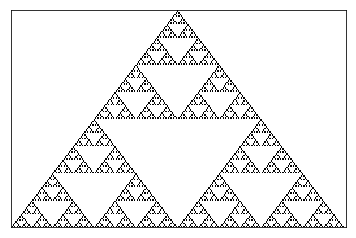

In [4]:
rule=18
n = 128
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)

drawer = PyplotDrawer()
drawer.draw(ca)
drawer.show()

**Testing:** Measure timing of various alternative (table lookups)

In [5]:
a = ca.array
t = ca.table
a.shape, t

((128, 257),
 {(0, 0, 0): 0,
  (0, 0, 1): 1,
  (0, 1, 0): 0,
  (0, 1, 1): 0,
  (1, 0, 0): 1,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 0})

In [6]:
%%timeit
idx = np.multiply(a[1,:], np.ones((3,1), dtype=int8))
for i in range(1,idx.shape[0]):
    idx[i,:-1*i] = idx[i,i:]
for i in range(0,idx.shape[1]-2):
    j = t[tuple(idx[:,i])]

1000 loops, best of 3: 1.45 ms per loop


In [7]:
%%timeit
idx = list(a[1,:2])
for i in a[1,2:]:
    idx.append(i)
    j = t[tuple(idx[-3:])]

1000 loops, best of 3: 1.15 ms per loop


In [8]:
from collections import deque

In [9]:
%%timeit
idx = deque(a[1,:2])
for i in a[1,2:]:
    idx.append(i)
    j = t[tuple(idx)]
    idx.popleft()    

1000 loops, best of 3: 1.14 ms per loop


In [10]:
%%timeit
b0 = a[1,0]
b1 = a[1,1]
for b2 in a[1,2:]:
    j = t[(b0,b1,b2)]
    b0 = b1
    b1 = b2

1000 loops, best of 3: 1.02 ms per loop


In [11]:
%timeit t[(0,1,0)]

t2 = (((0,1),(0,0)),((1,0),(0,0)))
%timeit t2[0][1][0]

t3 = (0,1,0,0,1,0,0,0)
%timeit t3[(0 << 2)+(1 << 1)+0]

The slowest run took 20.16 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 92.6 ns per loop
10000000 loops, best of 3: 114 ns per loop
10000000 loops, best of 3: 65.9 ns per loop


**Testing:** Measure timing of various alternatives (row updates)

In [12]:
ca.step??

In [13]:
def step1(ca):
    i = ca.next
    ca.next += 1
    
    a = ca.array
    t = ca.table
    for j in range(1,ca.m-1):
        a[i,j] = t[tuple(a[i-1, j-1:j+2])]

In [14]:
%%timeit
rule=18
n = 10
ca = CA(rule, n)
ca.start_single()

for i in range(n-1):
    step1(ca)

1000 loops, best of 3: 1.08 ms per loop


In [15]:
def step2(self):
    i = self.next
    self.next += 1
    
    a = self.array
    t = self.table
    
    prev = i - 1
    b0 = a[prev,0]
    b1 = a[prev,1]
    for b2, j in zip(a[prev, 2:], range(1, self.m-1)):
        a[i,j] = t[(b0 << 2)+(b1 << 1)+b2]        
        b0 = b1
        b1 = b2        

In [16]:
%%timeit
rule=18
n = 10
ca = CA(rule, n)
ca.table = binary(rule, 8)[::-1]
ca.start_single()

for i in range(n-1):
    step2(ca)

1000 loops, best of 3: 687 µs per loop


Update provided class with improved functions

In [17]:
def make_table(self, rule):
    """Returns a table for the given CA rule."""
    return binary(rule, 8)[::-1]

CA.make_table = make_table
CA.step = step2

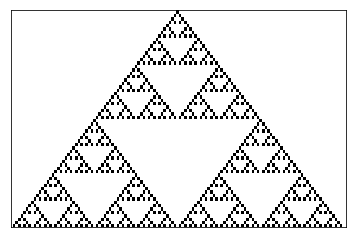

In [18]:
rule=18
n = 64
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer.draw(ca)

Set size of figure based on data to plot

In [19]:
drawer.draw??

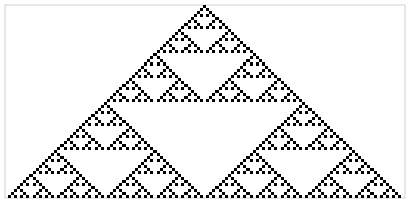

In [20]:
def draw(self, ca, start=0, end=None):    
    a = ca.get_array(start, end)
    rows, cols = a.shape
    
    dpi = 16.0
    fig = figure(figsize=(cols*4/dpi, rows*4/dpi), dpi=dpi)
    
    pyplot.gray()
    pyplot.pcolormesh(-numpy.flipud(a))
    pyplot.axis([0, cols, 0, rows])
    
    # empty lists draw no ticks
    pyplot.xticks([])
    pyplot.yticks([])
    
    #return fig
    
draw(drawer, ca)

In [21]:
PyplotDrawer.draw = draw

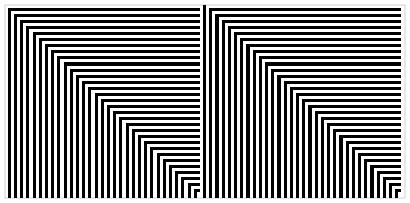

In [22]:
rule, n = (13, 64)
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = PyplotDrawer()
drawer.draw(ca)

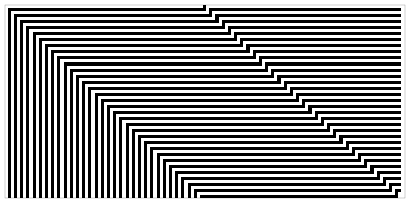

In [23]:
rule, n = (15, 64)
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = PyplotDrawer()
drawer.draw(ca)

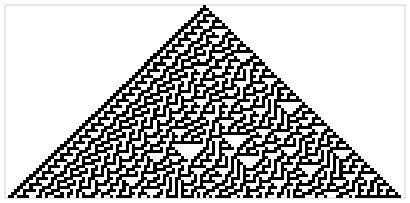

In [24]:
rule, n = (30, 64)
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer = PyplotDrawer()
drawer.draw(ca)

## Exercise 1

Download [thinkcomplex.com/CA.py](http://www.thinkcomplex.com/CA.py) and [thinkcomplex.com/CADrawer.py](http://www.thinkcomplex.com/CADrawer.py) and confirm that they run on your system; you might have to install additional Python packages.
Create a new class called CircularCA that extends CA so that the cells are arranged in a ring. Hint: you might find it useful to add a column of “ghost cells” to the array.

You can download my solution from [thinkcomplex.com/CircularCA.py](http://www.thinkcomplex.com/CircularCA.py)

In [25]:
class CircularCA(CA):
    """A variation of CA that wraps around so that the cells are
    arranged in a ring.
    """
    def __init__(self, rule, n=100, ratio=2):
        """n, m are the number of rows, columns.
        array is the numpy array that contains the data.
        next is the index of the next empty row.
        """
        self.table = self.make_table(rule)
        self.n = n
        # allocate two extra cells for ghosts
        self.m = ratio*n + 1 + 2
        self.array = numpy.zeros((self.n, self.m), dtype=numpy.int8)
        self.next = 0

    def start_single(self):
        """start with one cell in the left of the top row"""
        self.array[0, 1] = 1
        self.next += 1

    def step(self):
        """Executes one time step by computing the next row of the array."""
        i = self.next
        self.next += 1
        
        a = self.array
        t = self.table

        # copy the ghost cells
        a[i-1,0] = a[i-1,self.m-2]
        a[i-1,self.m-1] = a[i-1,1]
        
        prev = i - 1
        b0 = a[prev,0]
        b1 = a[prev,1]
        for b2, j in zip(a[prev, 2:], range(1, self.m-1)):
            a[i,j] = t[(b0 << 2)+(b1 << 1)+b2]        
            b0 = b1
            b1 = b2

    def get_array(self, start=0, end=None):
        """get a slice of columns from the CA, with slice indices
        (start, end).  We need to add one to avoid ghost cells.
        """
        if end==None:
            return self.array[:, start+1:self.m-1]
        else:
            return self.array[:, start+1:end+1]

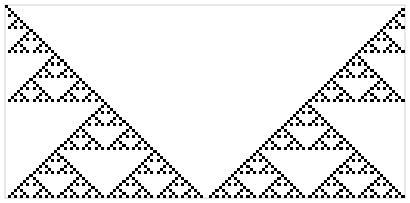

In [26]:
rule, n = (18, 64)
ca = CircularCA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer.draw(ca)

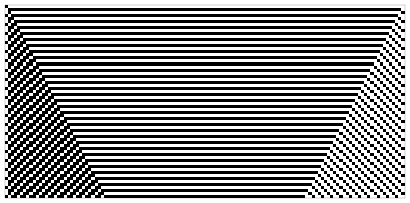

In [27]:
rule, n = (57, 64)
ca = CircularCA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer.draw(ca)

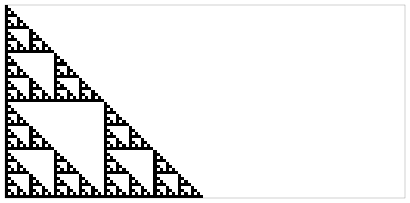

In [28]:
rule, n = (60, 64)
ca = CircularCA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer.draw(ca)

## Exercise 2

This exercise asks you to implement and test several PRNGs. 

 1. Write a program that implements one of the linear congruential generators described [here](http://en.wikipedia.org/wiki/Linear_congruential_generator).

 2. Download [DieHarder](http://phy.duke.edu/~rgb/General/rand_rate.php), a random number test suite, and use it to test your PRNG. How does it do?

 3. Read the documentation of Python’s random module. What PRNG does it use? Test it using DieHarder.

 4. Implement a Rule 30 CA on a ring with a few hundred cells, run it for as many time steps as you can in a reasonable amount of time, and output the center column as a sequence of bits. Test it using DieHarder.

[MathJax examples](http://nbviewer.ipython.org/url/github.com/ipython/ipython/raw/master/examples/notebooks/Typesetting%20Math%20Using%20MathJax.ipynb) [online editor](http://www.codecogs.com/latex/eqneditor.php)

The linear congruential generator is defined by the recurrence relation:

\begin{equation*} X_{n} \equiv \left ( a X_{n} + c \right ) \mod m  \end{equation*} 

where $X$ is the sequence of pseudorandom values, and

$m, 0<m$,  the "modulus" = $2^{48}$ for java.util.Random

$ a,\,0 < a < m $, the "multiplier" = $25214903917$ for java.util.Random

$ c,\,0 \le c < m $, the "increment" = $11$ for java.util.Random

$ X_0,\,0 \le X_0 < m $, the "seed" or "start value"


In [29]:
X = 17
m_2_x = 1 << 48
%timeit (25214903917*X+11) % 2**48
%timeit (25214903917*X+11) & m_2_x

The slowest run took 7.84 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 179 ns per loop
The slowest run took 6.74 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 208 ns per loop


In [30]:
class LinearCongruentialGenerator(object):
    '''An arbitrary linear congruential generator, defaulting to values for 
    java.util.Random. Unless provided, the number of seconds since 1/1/1970 
    is used as a seed'''
    def __init__(self, m=2**48, a=25214903917, c=11, seed=None):
        self.m = m
        self.a = a
        self.c = c

        if seed == None:
            t = dt.now() 
            
            seed = (t.toordinal() - dt(1970,1,1).toordinal()) * 86400 
            seed += t.hour * 3600 + t.minute * 60 + t.second
        self.X = seed
        
        # prime the pump
        self.next()
        
    def next(self):
        '''Calculate next value with arbitrary m'''
        X = self.a * self.X + self.c
        self.X = X % self.m
        return self.X
    
    def random(self, shape=(1,10)):
        '''Calculate an array of random numbers'''
        rows, cols = shape
        x = np.zeros(shape, dtype=np.uint64)
        
        for r in range(rows):
            for c in range(cols):
                x[r,c] = self.next()
                
        return x
    
        

In [31]:
lcg = LinearCongruentialGenerator()

lcg.next()

64119253261205

In [32]:
lcg.random((2,7))

array([[221087214001276, 242846738630871, 167994308111766, 110853251869929,
        254997097837888, 173318318353483, 104803367222778],
       [ 93409303936893, 244525669701188, 186666382512895, 234117820969118,
        167705072461649, 281452462457736,  52962886840563]], dtype=uint64)

**2.2.** Download [DieHarder](http://phy.duke.edu/~rgb/General/rand_rate.php), a random number test suite, and use it to test your PRNG. How does it do?

...need a new Cygwin with make installed...

**2.3.** Read the documentation of Python’s random module. What PRNG does it use? Test it using DieHarder.
    
_The Python library random uses Mersenne Twister with a period of 2**19937-1. Note that Python 3.6 added a [secrets module](https://docs.python.org/3/library/secrets.html#module-secrets) for cryptographic random number generation._

In [33]:
random?

**2.4.** Implement a Rule 30 CA on a ring with a few hundred cells, run it for as many time steps as you can in a reasonable amount of time, and output the center column as a sequence of bits. Test it using DieHarder.

## Exercise 3

Many CAs settle into a simple repeating pattern, with persistent structures that appear as disturbances in the background. Some of these structures translate in space, appearing as diagonals with different slopes, depending on how many time steps they take to shift by one column. These structures are called spaceships.

This exercise asks you to experiment with [Rule 110](http://en.wikipedia.org/wiki/Rule_110) and see how many spaceships you can find.

 1. Modify your program from the previous exercises so it starts with an initial condition that yields the stable background pattern.

 2. Modify the initial condition by adding different patterns in the center of the row and see which ones yield spaceships. You might want to enumerate all possible patterns of n bits, for some reasonable value of n. For each spaceship, can you find the period and rate of translation? What is the biggest spaceship you can find?

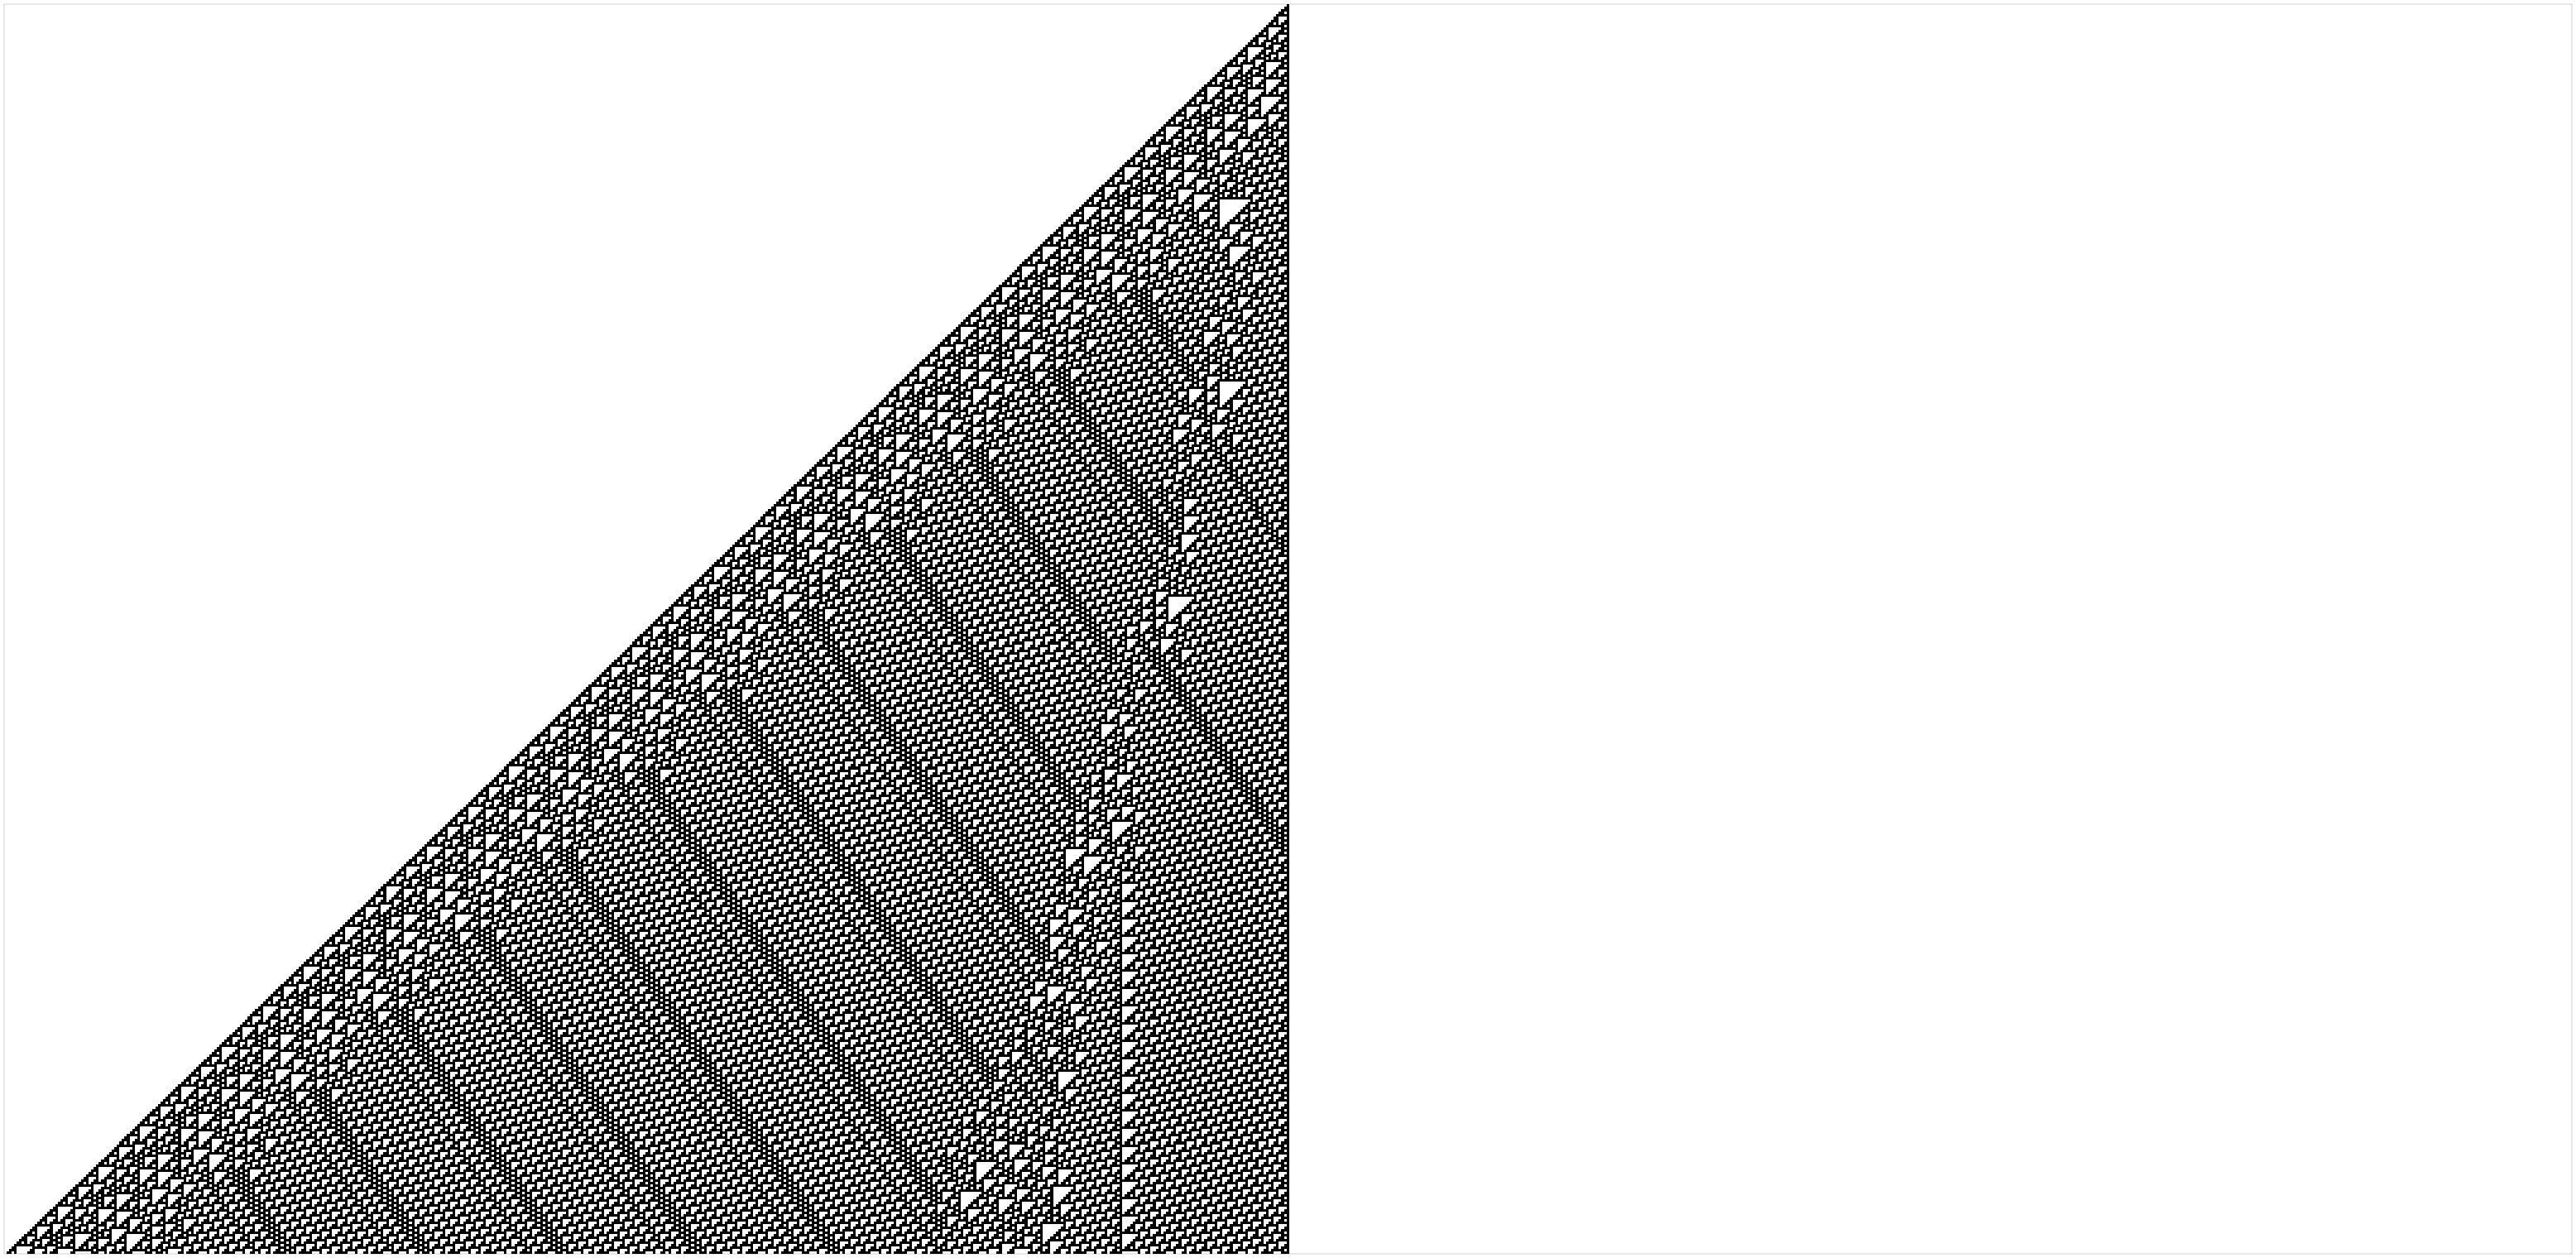

In [34]:
rule=110
n = 500
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)
drawer.draw(ca)

In [35]:
def start_seed(self, seed=None, center=True):
    '''Starts with specified or random value'''
    if seed == None: # Generate random seed
        seed = random.randint(2**(self.m-2), 2**(self.m-1) - 1)
    else: # truncate seed to shape
        seed = seed % (2**(self.m-1))
    
    # pad msb with 0's
    s = '{0:0'+str(self.m-1)+'b}'
    bits = s.format(seed)
    
    if center: # Fit values to center of array
        shift = (self.m - len(bits)) // 2
    else:
        shift = 0        
        
    c = -1
    for c in range(shift):
        self.array[0, c+1] = 0
        
    def _bcgen(c, bits):
        '''Iterate over bits and column index'''
        c += 1 # to avoid +1 in assignment
        for b in bits:
            c += 1
            yield int(b), c
            
    for b, i, in _bcgen(c, bits):
        self.array[0, i] = b
    self.next += 1
    
    return seed

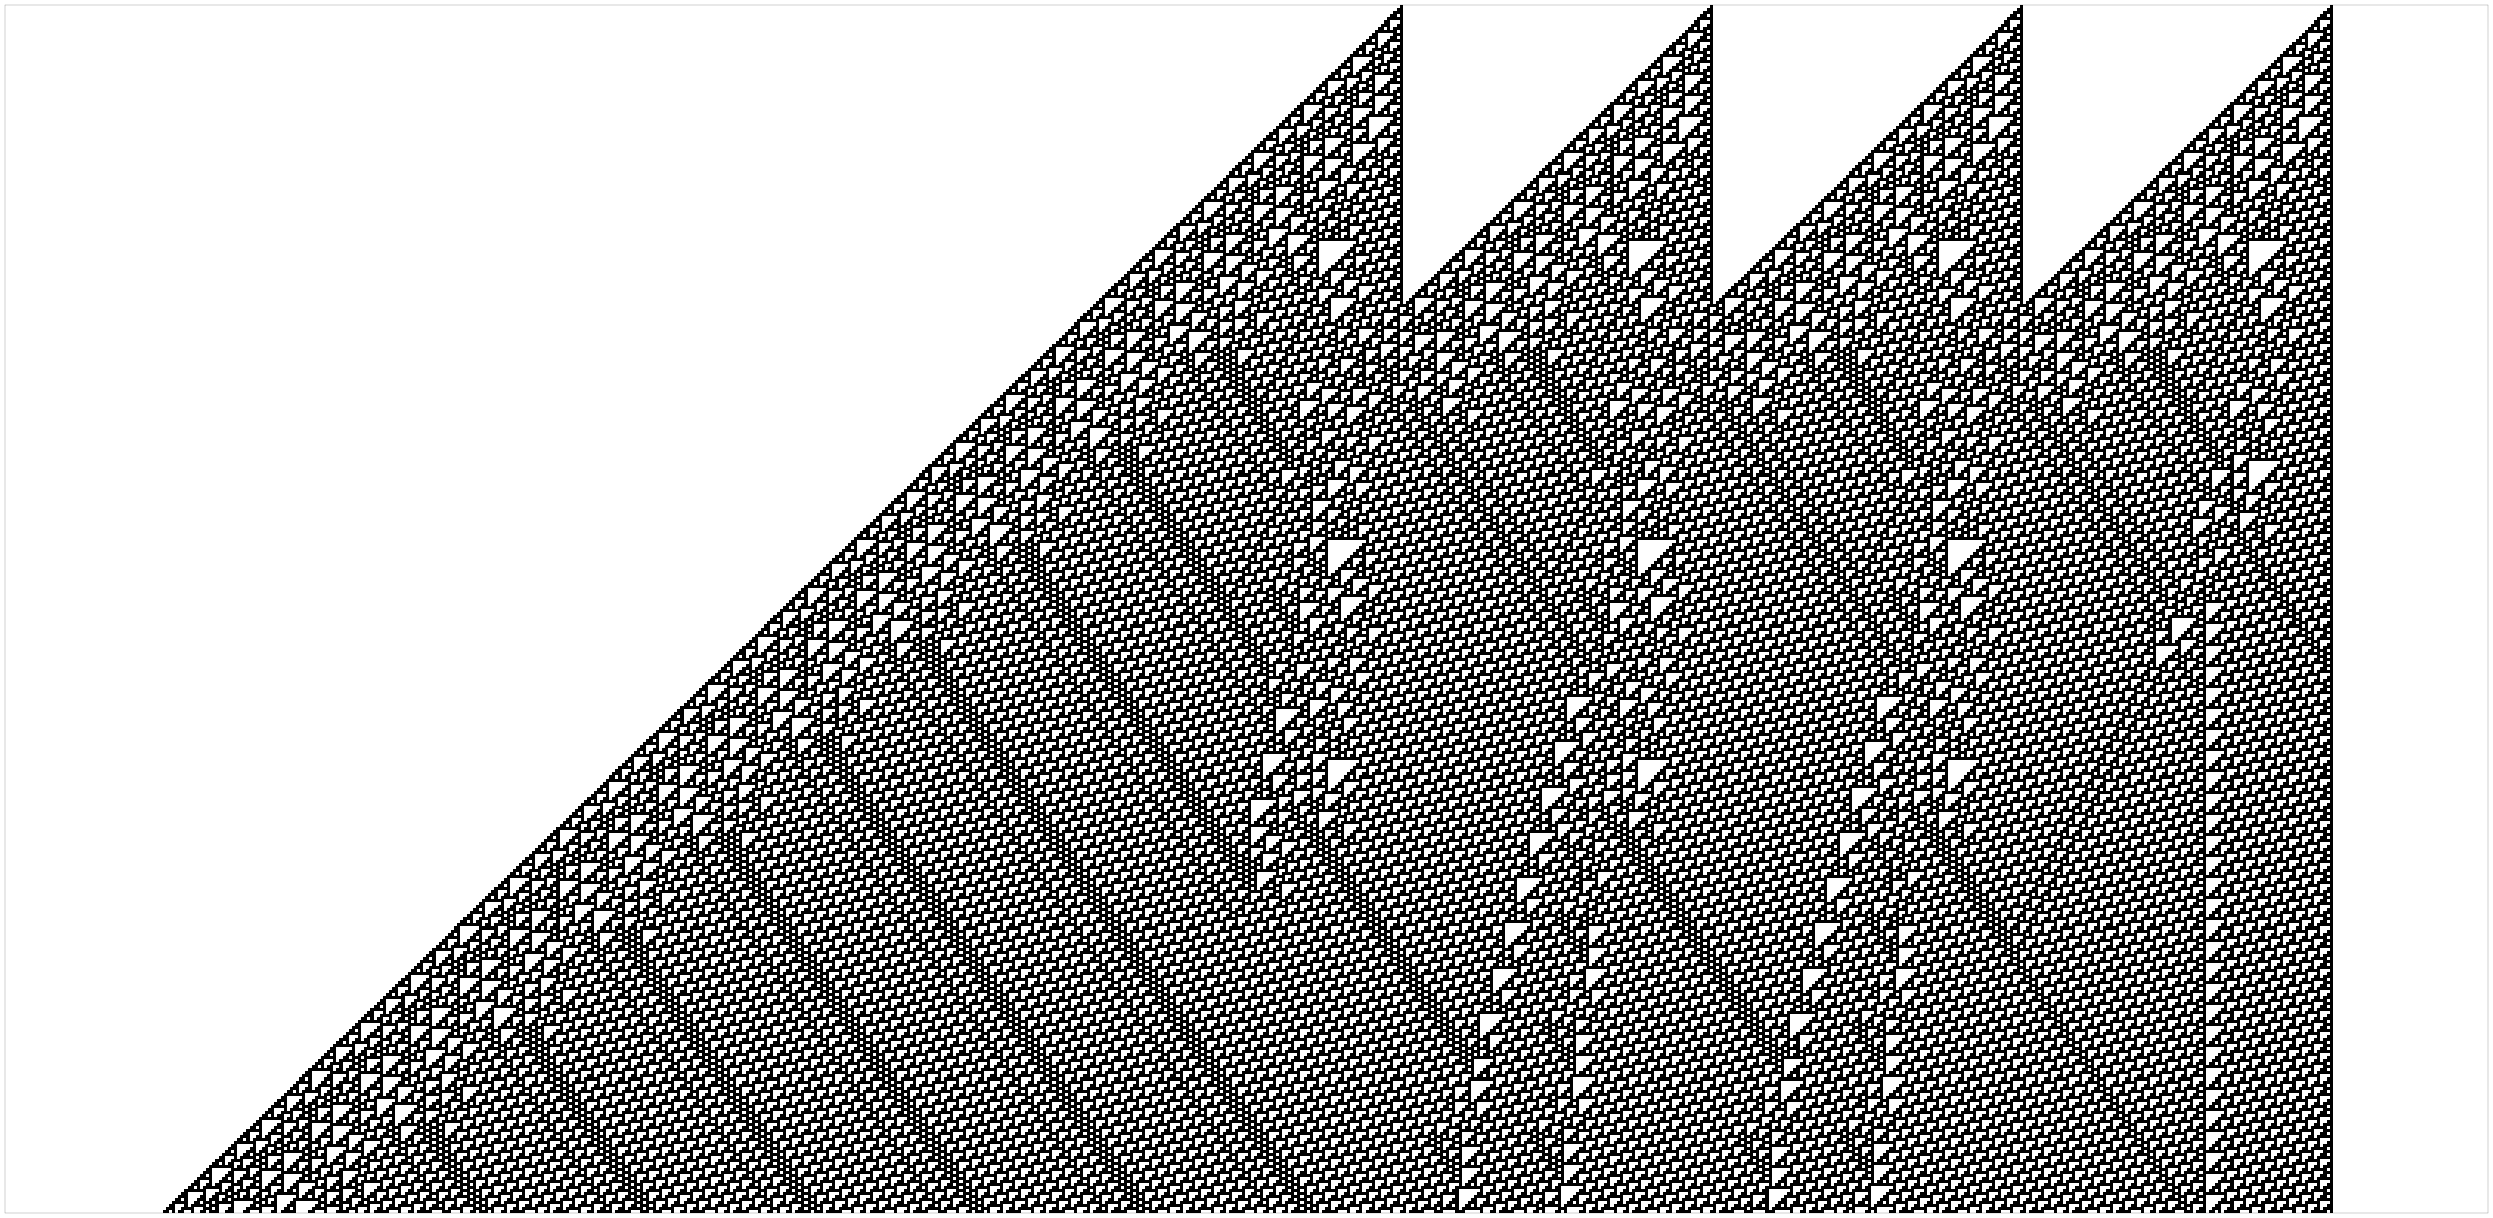

In [36]:
rule=110
n = 400
seed = (1 << 50) + (1 << 150) + (1 << 250) + (1 << 350)
ca = CA(rule, n)
start_seed(ca, seed, False)
ca.loop(n-1)
drawer.draw(ca)

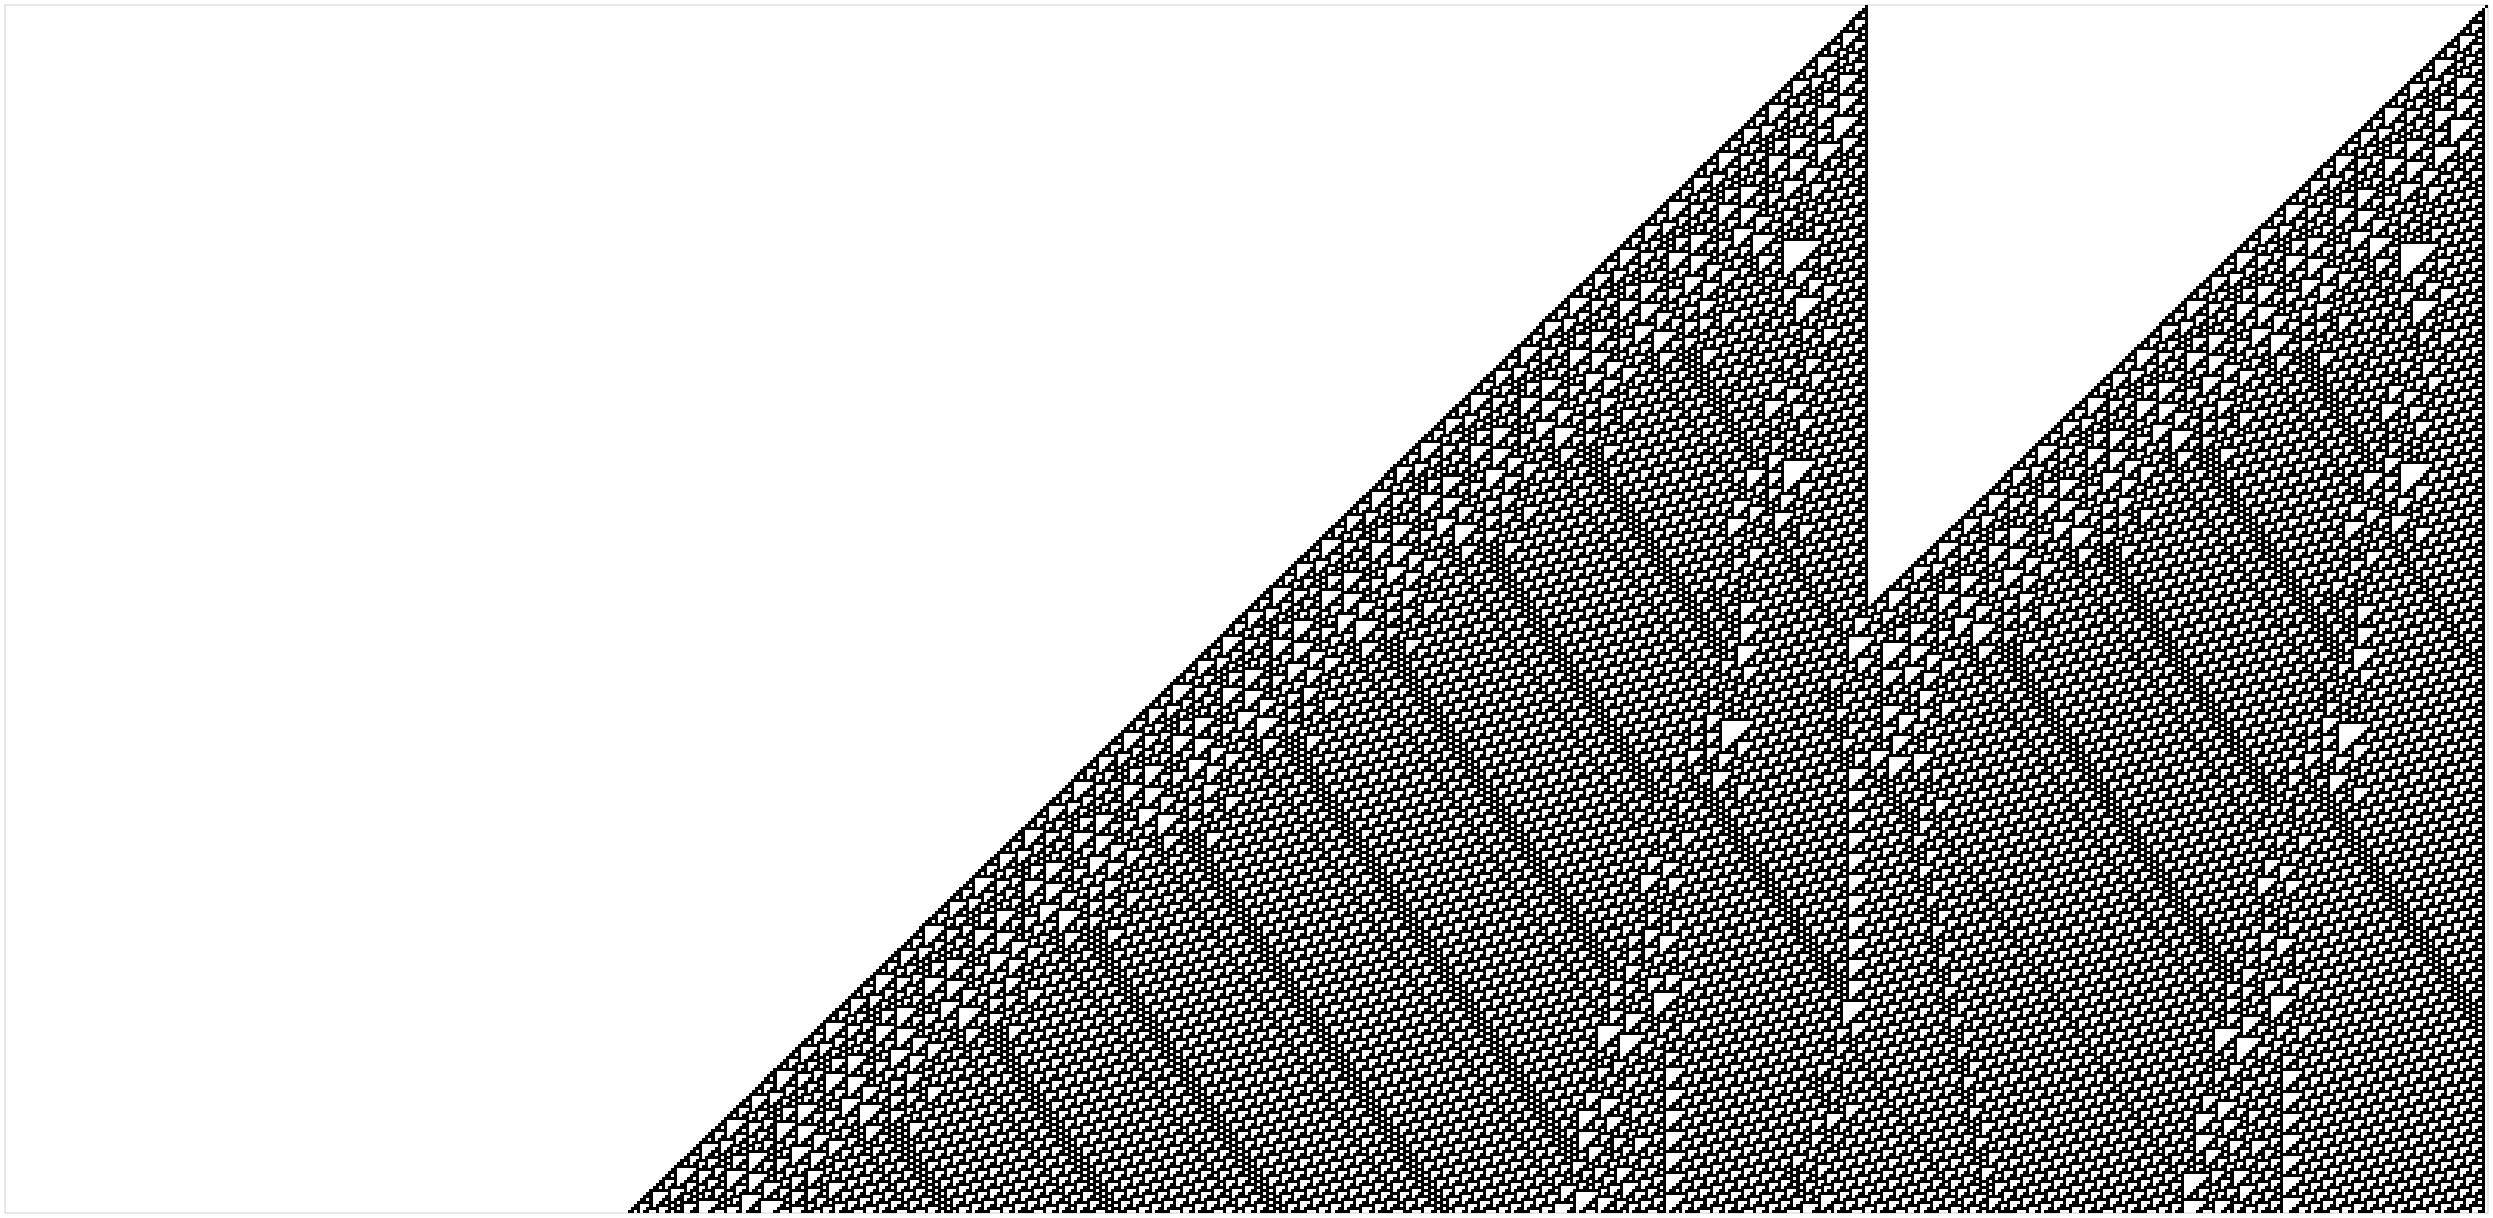

In [37]:
rule=110
n = 400
seed = (1 << 200) + 1
ca = CA(rule, n)
start_seed(ca, seed, True)
ca.loop(n-1)
drawer.draw(ca)

Using seed 0x0D5E90F75B6B8BBF4E8ECFC465E5AAF2796D5D8BBBBBF07BF786ACC22947316D7DC0DAECD59A6AD982DAE4A741FC0BB0AD55BB028642F54B2E17F5A8D139FC3E2B679B28E939F6EC35F0B211134C995B3C25600254E1AAFCDD2498E78FA74C0F950D102D4


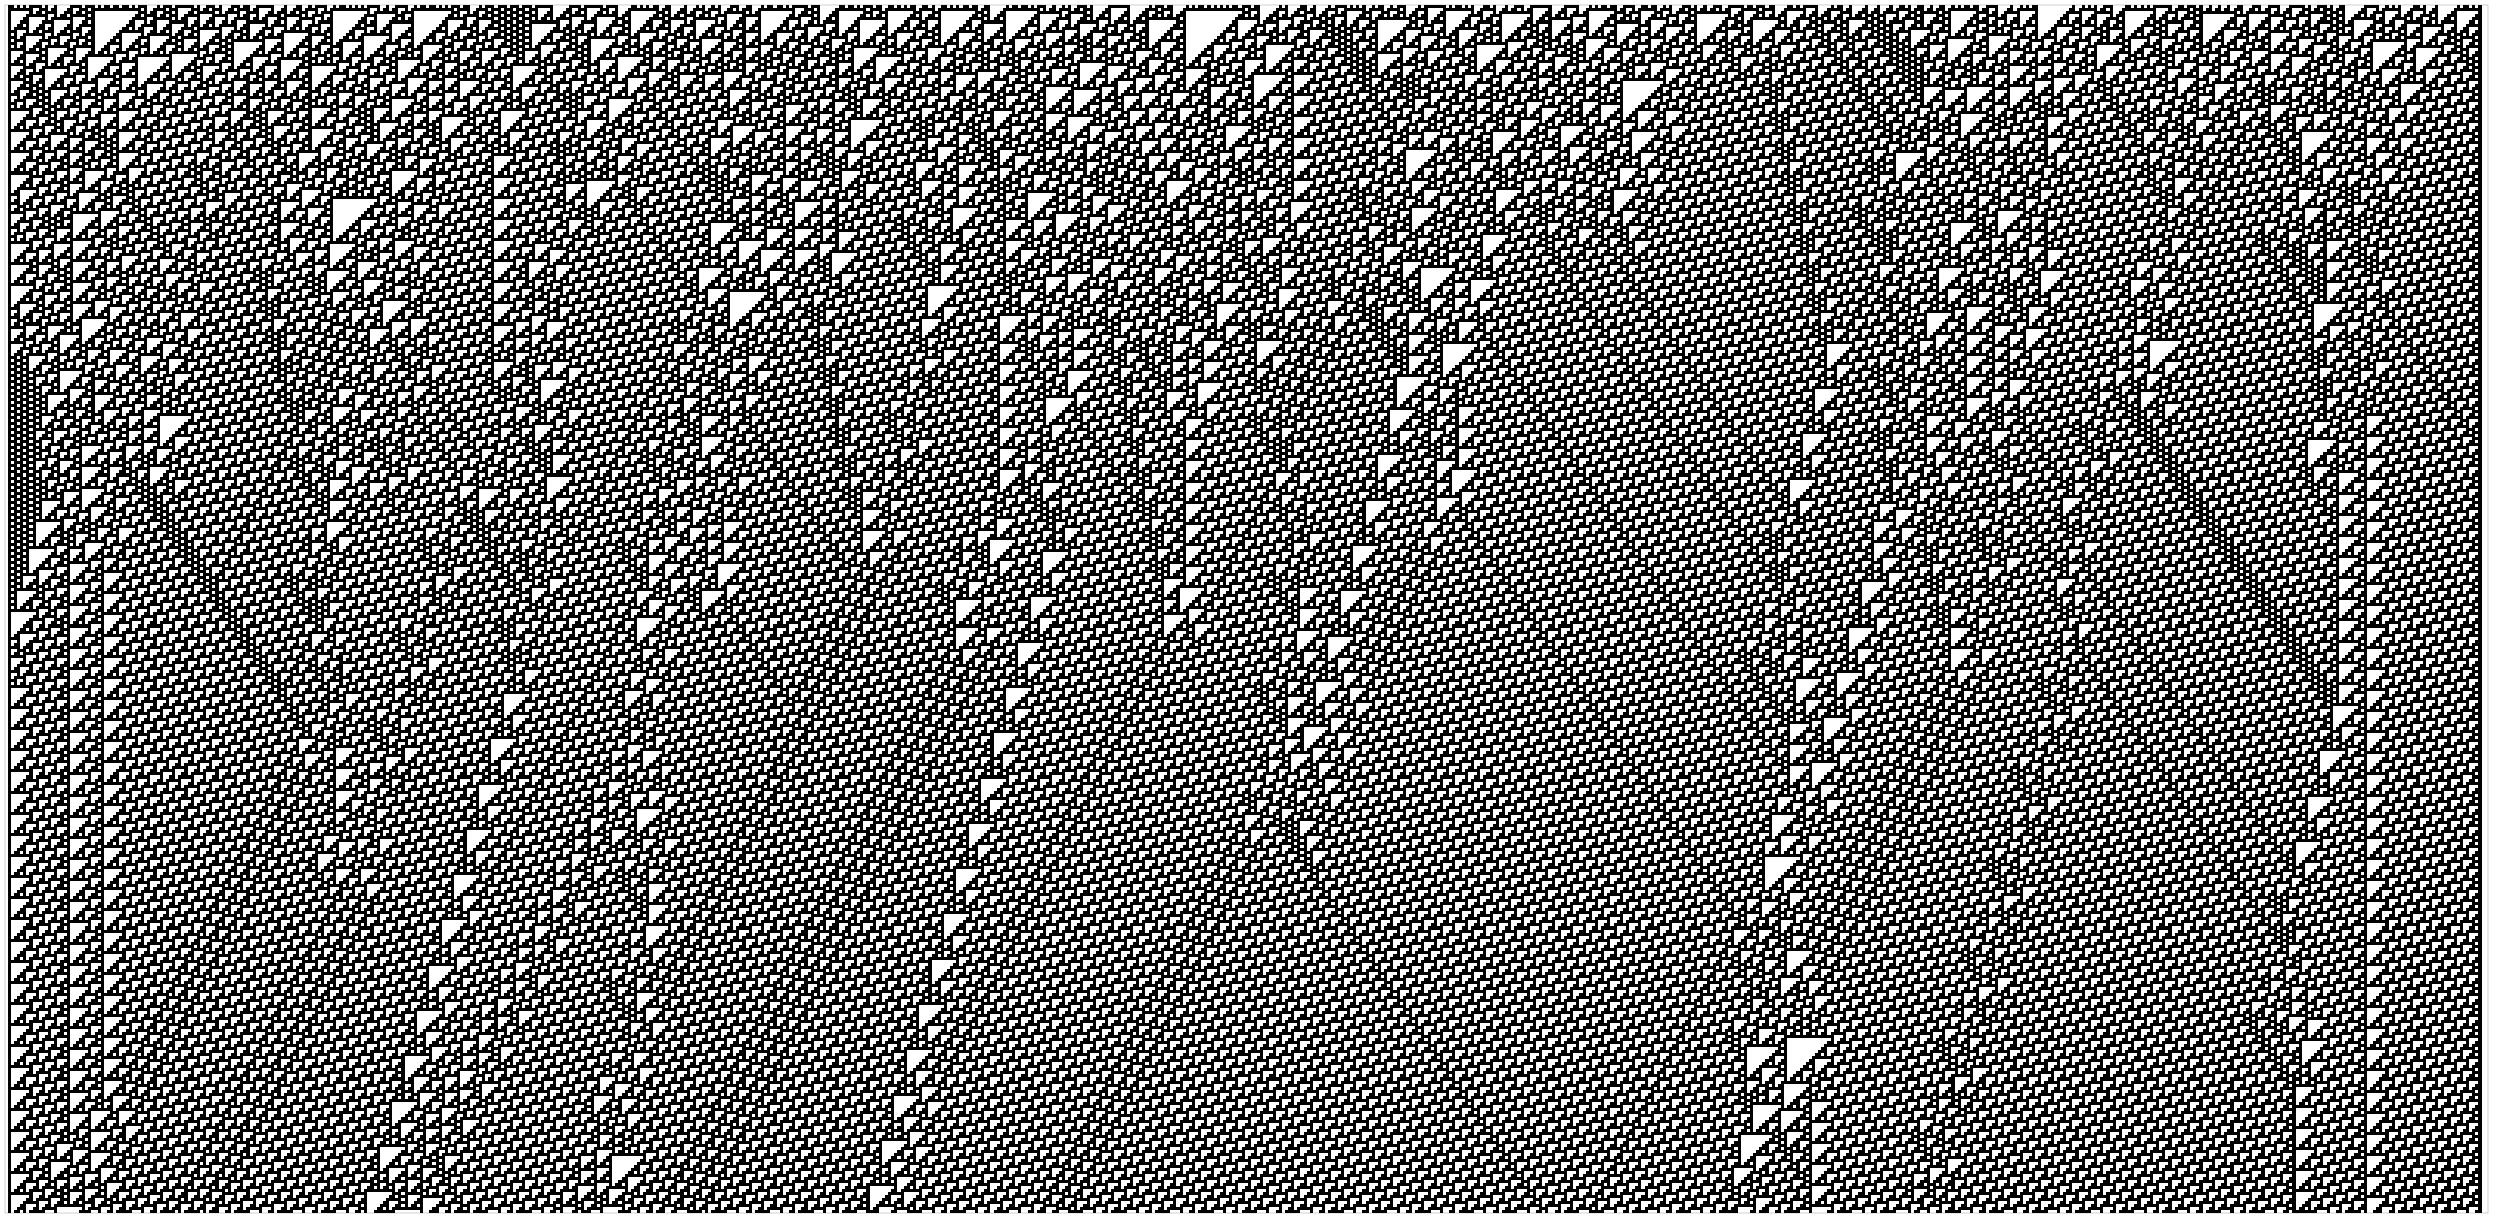

In [38]:
rule=110
n = 400
ca = CA(rule, n)
s = 'Using seed 0x{0:0'+'{0:d}'.format(int(np.ceil(ca.m / 4.0)))+'X}'
print(s.format(start_seed(ca)))
ca.loop(n-1)
drawer.draw(ca)

In [39]:
# Seems to work, add it to the class!
CA.start_seed = start_seed

Using seed 0x09C2621279B95030D8DCB447CDE368F264A5ED9211266823BE6A97BA7CF668C27316F7924A6557CC94158A71F103CBC406880D7ACF341D7D5871ABFC48D1A9F73DAF27A99CF6B0B4A7E684DE23D7D49C35C3A66548E03B3C1BAAF61DF30C02CF6BD162233


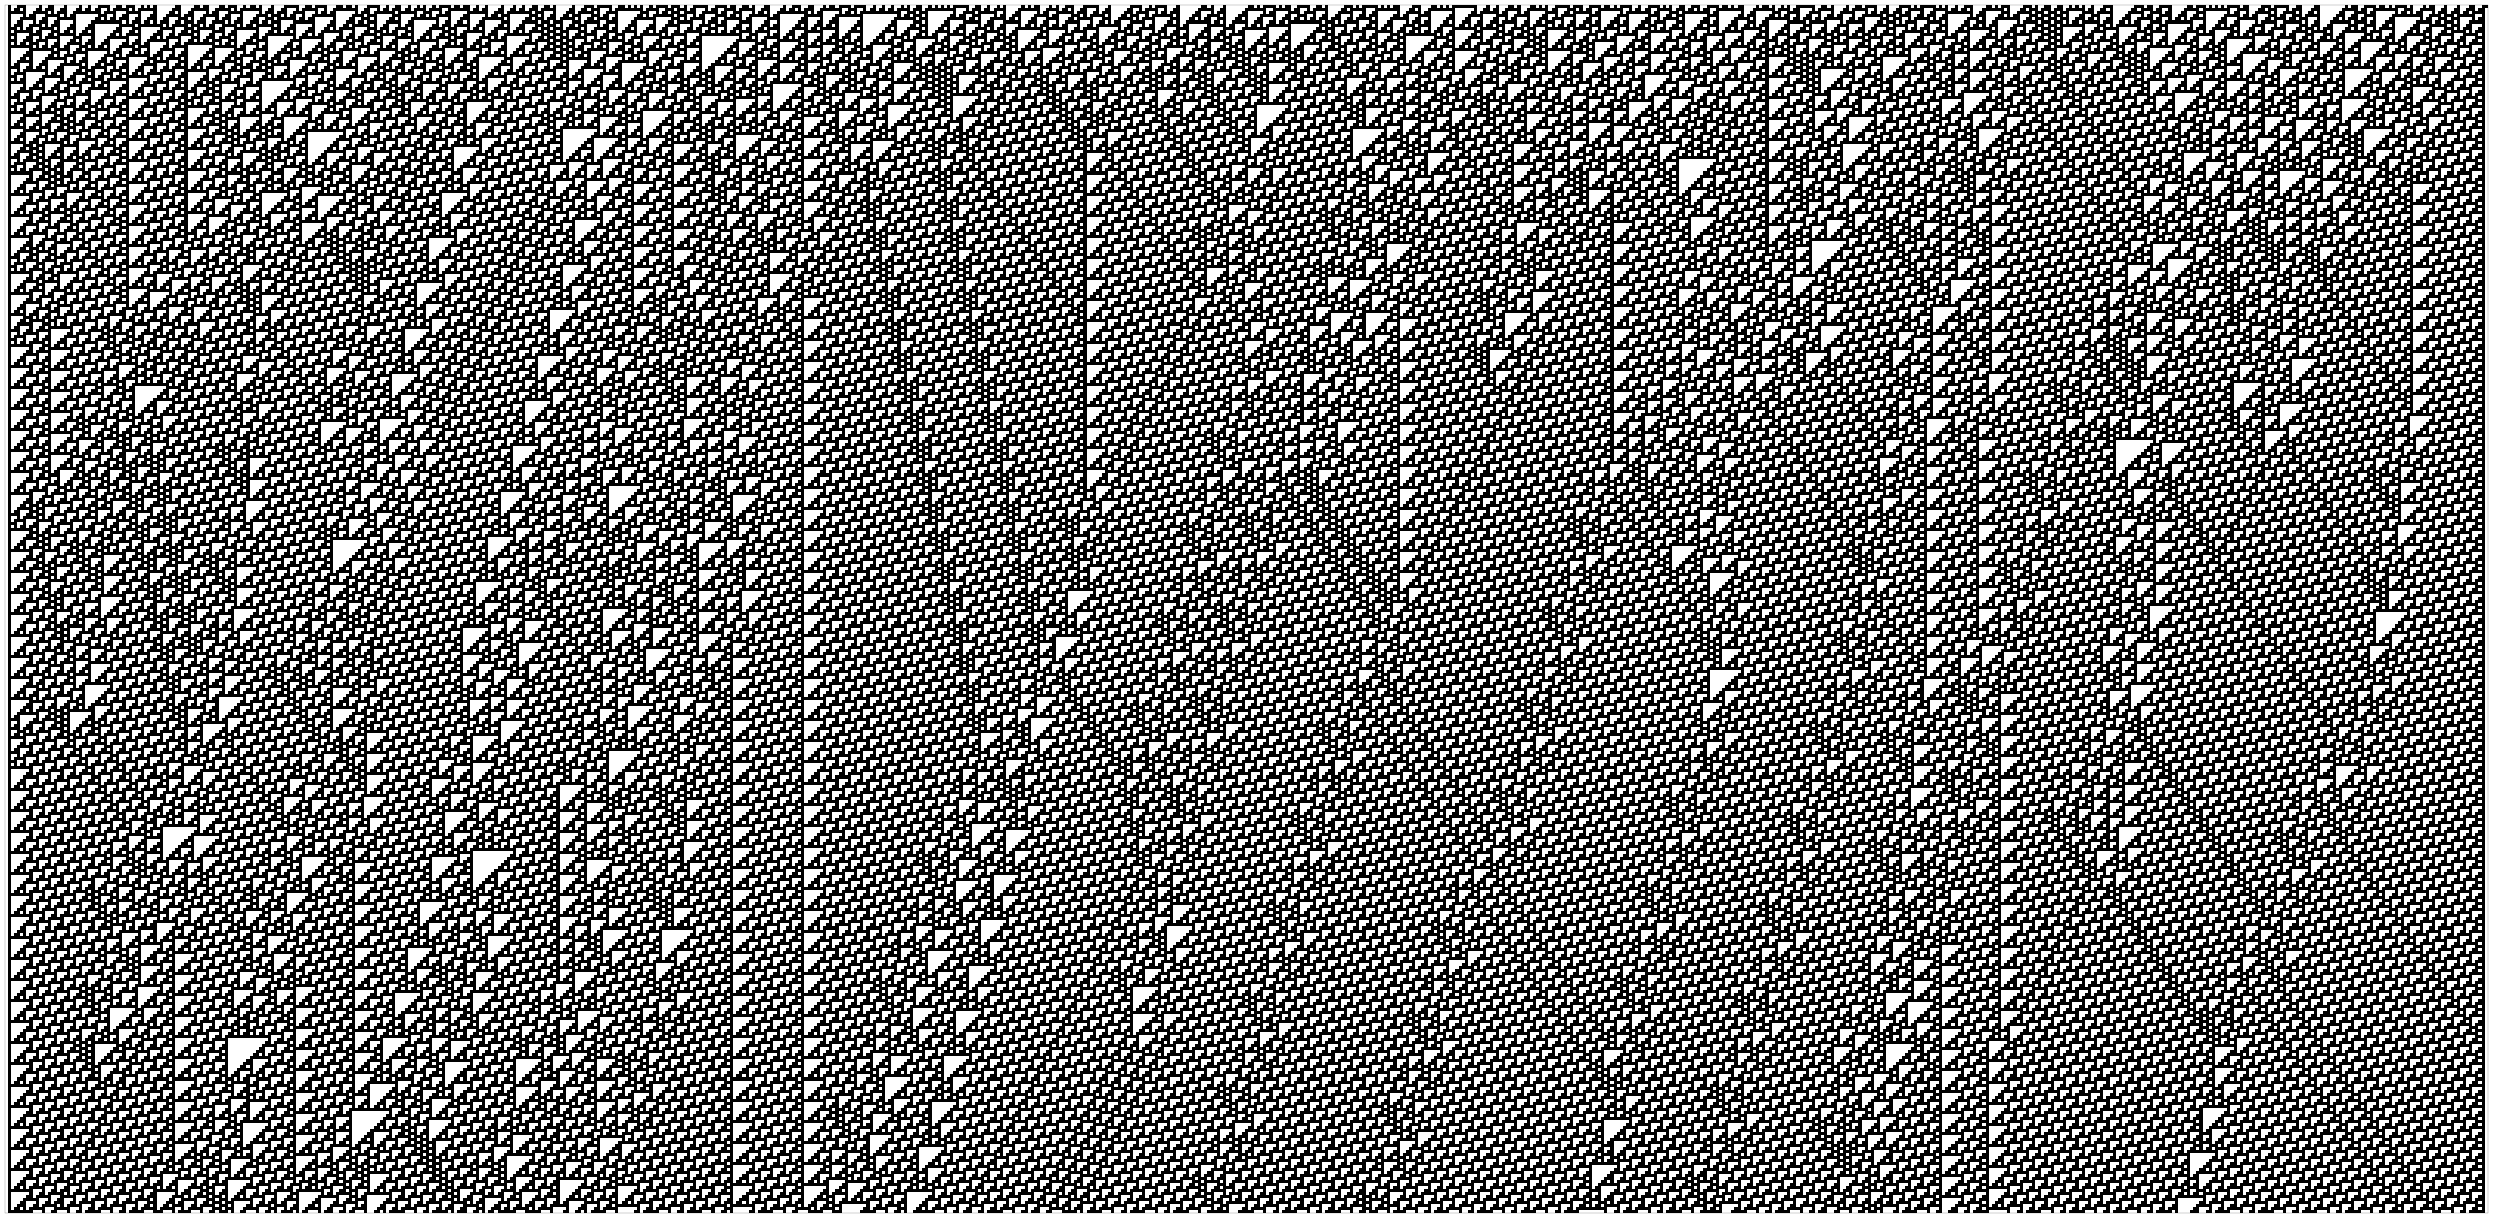

In [40]:
rule=110
n = 400
ca = CA(rule, n)
s = 'Using seed 0x{0:0'+'{0:d}'.format(int(np.ceil(ca.m / 4.0)))+'X}'
print(s.format(ca.start_seed()))
ca.loop(n-1)
drawer.draw(ca)

## Exercise 4

The goal of this exercise is to implement a [Turing machine](http://en.wikipedia.org/wiki/Turing_machine).

1. Start with a copy of CA.py named TM.py. Add attributes to represent the location of the head, the action table and the state register.
2. Override step to implement a Turing machine update.
3. For the action table, use the rules for a 3-state [busy beaver](http://en.wikipedia.org/wiki/Busy_beaver).
4. Write a class named TMDrawer that generates an image that represents the state of the tape and the position and state of the head. For one example of what that might look like, see http://mathworld.wolfram.com/TuringMachine.html.

In [41]:
def num_bits(num):
    return len('{0:b}'.format(num))

class TM(CA):
    '''Implements a busy beaver Turing machine'''
    def __init__(self, action_table=None, n=100, ratio=2):
        '''m-Symbol, n-State Action Table:
        State 0: Read 0, Read 1, ... Read m=(Write #, Move Direction, Next State)
        State 1: Read 0, Read 1, ... Read m=(Write #, Move Direction, Next State)
         ...
        State n: Read 0, Read 1, ... Read m=(Write #, Move Direction, Next State)
        '''
        if action_table == None: # (write symbol, move direction, next state)
            action_table = ( ((1,+1,1), (1,-1,2)),
                             ((1,-1,0), (1,+1,1)),
                             ((1,-1,1), (1,0,None)) )                            
        self.action_table = action_table
        self.state = 0

        self.num_states  = len(action_table)
        self.num_symbols = 1+max([ i[0] for st in action_table for i in st ])
        
        state_bits = num_bits(self.num_states)
        sym_bits = num_bits(self.num_symbols-1)
        
        self.mask_sym   = (1 << sym_bits) - 1
        self.mask_touch = 1 << sym_bits
        self.mask_state = ((1 << state_bits) - 1) << (sym_bits + 1)
        self.shft_state = sym_bits + 1

        self.bits_state = 1 << state_bits
        
        # For the drawer, include extra information
        total_bits  = sym_bits   # Turing machine needs symbols
        total_bits += 1          # If Turing machine has touched this position
        total_bits += state_bits # Turing machine state at current position

        if total_bits <= 8:
            dtype=numpy.uint8
        elif total_bits <= 16:
            dtype=numpy.uint16
        elif total_bits <= 32:
            dtype=numpy.uint32
        else:
            dtype=numpy.uint64            
        
        self.n = n
        self.m = ratio*n + 1
        self.array = numpy.zeros((n, self.m), dtype=dtype)
        
        self.position = self.m // 2
        self.next = 1
        self.score = 0
        self.halt = 0
        
    def step(self):
        '''Execute one step of the Turing machine'''
        if self.halt:
            pass
        elif self.next < self.n:
            # Read current symbol
            scanned = self.mask_sym & self.array[self.next, self.position]
            # Look up action
            state = self.action_table[self.state]        
            write, move, next_st = state[scanned]
            # Perform action
            self.array[self.next:, self.position] = write + self.mask_touch
            if next_st == None:
                self.halt = self.next + 1
                # Make it easier to see when it stops
                self.score = self._score()
                self.array[self.halt:, :] = 0
            else:
                self.array[self.next, self.position] += (next_st+1) << self.shft_state
            self.state     = next_st
            self.position += move
            
        self.next += 1        
        
    def start_seed(self, seed=None, center=True):
        '''Extend start condition to whole array'''
        seed = CA.start_seed(self, seed, center)
        for r in range(1, self.n):
            self.array[r,:] = self.array[0,:]
        return seed
    
    def _symbol(self, x):
        '''Only count symbols placed by Turing machine'''
        if x & self.mask_touch:
            return x & self.mask_sym
        else:
            return 0
    
    def _score(self):
        score = 0
        r = min(self.n - 1, self.next)
        for sym in map(self._symbol, self.array[r,:]):
            score += sym
        return score
        
    def currentScore(self):
        if self.state != None:
            self.score = self._score()
        return self.score
        

Using seed 0x08E4AEE4C9DCB88696182


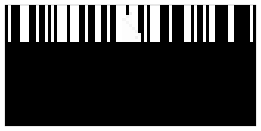

In [42]:
n = 40
ca = TM(n=n)
s = 'Using seed 0x{0:0'+'{0:d}'.format(int(np.ceil(ca.m / 4.0)))+'X}'
seed = ca.start_seed()
ca.loop(n-1)
print(s.format(seed))
drawer.draw(ca)

In [43]:
def HS2Colors(n=2, hue=0, sat=1):
    '''Create n colors around a hue and saturation'''
    if (hue > 1) or (sat > 1):
        hue = (hue / 256.0) % 1
        sat = (sat / 256.0) % 1
    
    hsv_colors = numpy.empty((1, n, 3))    
    hsv_colors[:, :, 0] = hue
    hsv_colors[:, :, 1] = sat
    hsv_colors[:, :, 2] = np.linspace(0.85, 0.55, n)
    
    (rgb_colors,) = matplotlib.colors.hsv_to_rgb(hsv_colors)
    return rgb_colors

def HSColormap(n=2, hue=0, sat=1):
    '''Create color map from HS2Colors sequence'''
    colors = np.zeros((n, 4))
    colors[:, 0]  = np.linspace(0, 1, n)
    colors[:, 1:] = HS2Colors(n,  hue,  sat)
    cdict = {'red':   [ (i[0], i[1], i[1]) for i in colors ],
             'green': [ (i[0], i[2], i[2]) for i in colors ],
             'blue':  [ (i[0], i[3], i[3]) for i in colors ]}
    return matplotlib.colors.LinearSegmentedColormap('my_colormap', cdict, 256)

In [44]:
class TMDrawer(object):
    def __init__(self):
        pass
    
    def _CreateColors(self, ca):
        # Create color lookup
        num_symbols = ca.mask_touch
        num_states  = ca.bits_state
        
        colors = [HS2Colors(num_symbols,  0,  0), # grey scale for default states
                  HS2Colors(num_symbols, 26, 97)] # brown for placed values
        for i in np.linspace(0,1,num_states+2):
            if (i == 0) or (i == 1):
                continue
            colors += [ matplotlib.cm.Blues_r(i)[:-1] ]*2
        
        num = len(colors) * num_symbols
        merged = np.zeros((num, 3))
        for i, c in enumerate(colors):
            merged[num_symbols*i:num_symbols*(i+1), :] = c
        return merged
    
    def colors(self, ca):
        # test colors
        colors = self._CreateColors(ca)
        
        x = colors.shape[0] * 10
        im = np.zeros((10, x, 3))
        for i, c in enumerate(colors):
            im[:, 10*i:10*(i+1)] = c
            
        pyplot.imshow(im, interpolation="nearest")
        
        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])
    
    def draw(self, ca, state=True):
        colors = self._CreateColors(ca)
        
        # Create image
        x, y = ca.array.shape
        im = np.zeros((x,y,3))
        for i in range(3):
            im[:,:,i] = ca.array
        
        if state:
            Lookup = np.vectorize(lambda x, y: colors[int(x), y])
        else:
            mask = ca.mask_touch + ca.mask_sym
            Lookup = np.vectorize(lambda x, y: colors[int(x) & mask, y])        
            
        for i in range(3):
            im[:,:,i] = Lookup(im[:,:,i], i)
        
        pyplot.imshow(im, interpolation="nearest")

        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])
        

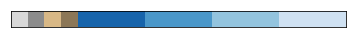

In [45]:
tmdraw = TMDrawer()
tmdraw.colors(ca)

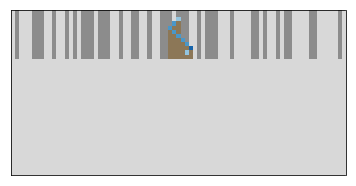

In [46]:
tmdraw.draw(ca)

Using seed 0x0CB614221A5121FF02119A7908


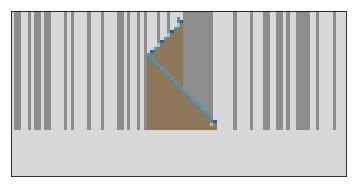

In [58]:
n = 50
while True:
    ca = TM(n=n)
    s = 'Using seed 0x{0:0'+'{0:d}'.format(int(np.ceil(ca.m / 4.0)))+'X}'
    seed = ca.start_seed()
    ca.loop(n-1)
    
    if ca.halt > 30:
        break
        
print(s.format(seed))
tmdraw.draw(ca)

Score = 13 after 20 steps


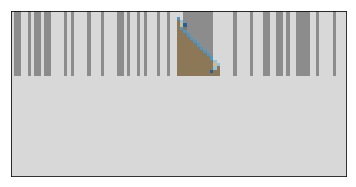

In [59]:
bb_3state = ( ((1,+1,1),(1,+1,None)),
              ((0,+1,2),(1,+1,1)),
              ((1,-1,2),(1,-1,0)) )
ca = TM(bb_3state, n)
ca.start_seed(seed)
ca.loop(n-1)
tmdraw.draw(ca)
s='Score = {0:d} after {1:d} steps'
if ca.halt:
    print(s.format(ca.currentScore(), ca.halt))
else:    
    print(s.format(ca.currentScore(), ca.next))

Score = 8 after 51 steps


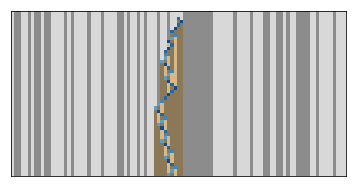

In [60]:
bb_4state = ( ((1,+1,1),(1,-1,1)),
              ((1,-1,0),(0,-1,2)),
              ((1,+1,None),(1,-1,3)),
              ((1,+1,3),(0,+1,0)) )
ca = TM(bb_4state, n)
ca.start_seed(seed)
ca.loop(n-1)
tmdraw.draw(ca)
s='Score = {0:d} after {1:d} steps'
if ca.halt:
    print(s.format(ca.currentScore(), ca.halt))
else:    
    print(s.format(ca.currentScore(), ca.next))